# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.ticker import AutoMinorLocator
import pandas as pd
import numpy as np
from splinter import Browser
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as soup
# import below when using Chrome browser
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
# Set some default options for chrome browser
options = webdriver.ChromeOptions()
options.add_argument("--lang=en")
options.add_argument("--start-maximized")
options.add_argument("--disable-notifications")
# Set up splinter (PS: executable_path has deprecated)
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False, options=options)

In [3]:
from datetime import datetime as dt
import os
# set local chromedriver
chromedrv = os.path.expanduser('~/ucbDA/chromedriver_win32/chromedriver')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# read table(s) from the website as a pd.DataFrame
pd_mars_df = pd.read_html(url)[0]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
# Loop through the scraped data to create a list of rows
# convert data to the correct data type
# Create a Pandas DataFrame by using the list of rows and a list of the column names
pd_mars_df['terrestrial_date'] = pd.to_datetime(pd_mars_df['terrestrial_date'])
pd_mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [7]:
# Confirm DataFrame was created successfully
pd_mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [8]:
pd_mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
# Change data types for data analysis
# Confirm type changes were successful by examining data types again
pd_mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [35]:
# 1. How many months are there on Mars?
months_mars = pd_mars_df['month'].value_counts()
months_mars

4     194
3     192
2     178
1     174
12    166
5     149
6     147
7     142
8     141
11    138
9     134
10    112
Name: month, dtype: int64

In [38]:
# 2. How many Martian days' worth of data are there?
# 1 earth day = 86164.0916s or 23.93 hours
# 1 martian day = 88775.245s or 24.66 hours
# calculate how many sols exist in a Martian year based on monthly elapsed sols
sols = 0
for mm in months_mars:
    sol_duration = pd_mars_df.loc[pd_mars_df['month'] == mm, 'sol'].max() - pd_mars_df.loc[pd_mars_df['month'] == mm, 'sol'].min()
    sols += (sol_duration / 24.66)
# number of Martian days included in the dataset
print(pd_mars_df['sol'].agg(['max', 'min']))
sol_range = pd_mars_df['sol'].max() - pd_mars_df['sol'].min()

max    1977
min      10
Name: sol, dtype: int64


In [42]:
# 3. What is the average low temperature by month?
# get table headers
headers = list(pd_mars_df)
# coldest and warmest months on Mars
mintemp_df = pd_mars_df[headers[2:]].groupby('month', as_index=False).mean().sort_values('min_temp')
mintemp_df

min_temp = mintemp_df['min_temp']
min_temp

2    -83.307292
3    -82.747423
1    -79.932584
4    -79.308725
0    -77.160920
5    -75.299320
11   -74.451807
6    -72.281690
10   -71.985507
9    -71.982143
8    -69.171642
7    -68.382979
Name: min_temp, dtype: float64

In [43]:
# Plot the average temperature by month
# plot the average minimum daily temperature of all the months
def barplot(x, y, title):
    style.use('fivethirtyeight')
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(x, y)
    ax.set_title(title)
    ax.set_xlabel(f'{title.split()[-2]} {title.split()[-1]}')
    ax.set_xticks(x)
    if 'min temperature' in title.lower():
        ax.set_ylabel('Min Temperature (\N{DEGREE SIGN}F)')
        ax.set_yticks(np.arange(0, -91, -10))
    elif 'pressure' in title.lower():
        ax.set_ylabel('Pressure')
        ax.set_yticks(np.arange(0, 1001, 100))
    elif 'longitude' in title.lower():
        ax.set_ylabel('Solar Longitude (rad)')
    else:
        ax.set_ylabel(f'{title.split()[1]} {title.split()[2]} (sols)')

    # Show Figure
    plt.show()

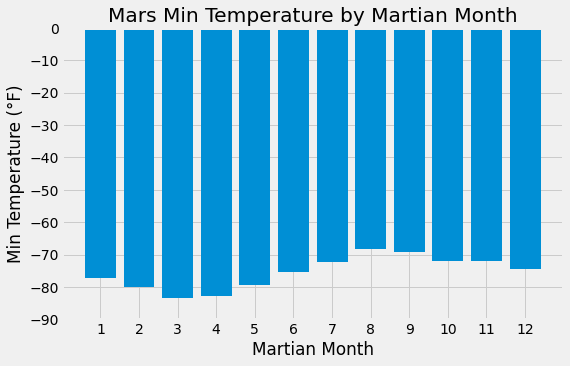

In [44]:
barplot(mintemp_df['month'], mintemp_df['min_temp'], 'Mars Min Temperature by Martian Month')

# Identify the coldest and hottest months in Curiosity's location
The coldest months is March, while the hottest month is July.

In [47]:
# Coldest and warmest months
pd_mars_df.loc[(pd_mars_df['min_temp'] == pd_mars_df['min_temp'].min()) | (pd_mars_df['min_temp'] == pd_mars_df['min_temp'].max()), headers[1:]]

,terrestrial_date,sol,ls,month,min_temp,pressure
1093,2015-12-09,1188,79,3,-90.0,881.0
1582,2017-05-10,1692,2,1,-62.0,820.0


In [45]:
# 4. Average pressure by Martian month
pressure_df = pd_mars_df[headers[2:]].groupby('month', as_index=False).mean().sort_values('pressure')
pressure_df

,month,sol,ls,min_temp,pressure
5,6,750.829932,164.897959,-75.299320,745.054422
4,5,1182.691275,132.885906,-79.308725,748.557047
6,7,715.105634,194.894366,-72.281690,795.105634
3,4,1244.500000,104.365979,-82.747423,806.329897
11,12,990.951807,344.692771,-74.451807,842.156627
10,11,947.224638,314.536232,-71.985507,857.014493
0,1,1077.574713,15.281609,-77.160920,862.488506
7,8,795.333333,224.347518,-68.382979,873.829787
2,3,1204.406250,75.010417,-83.307292,877.322917
9,10,1034.669643,286.330357,-71.982143,887.312500


In [48]:
# Months with lowest and higest atmospheric pressure on Mars
pd_mars_df.loc[(pd_mars_df['pressure'] == pd_mars_df['pressure'].min()) | (pd_mars_df['pressure'] == pd_mars_df['pressure'].max()), headers[1:]]


,terrestrial_date,sol,ls,month,min_temp,pressure
156,2013-01-27,170,252,9,-66.0,925.0
157,2013-01-28,171,253,9,-67.0,925.0
766,2014-12-23,846,257,9,-74.0,925.0
1866,2018-02-27,1977,135,5,-77.0,727.0


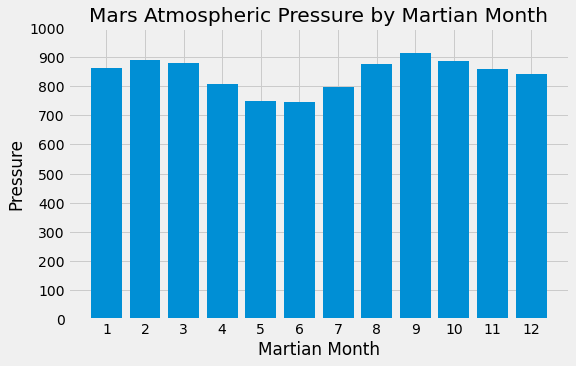

In [49]:
# Plot the average pressure by month
barplot(pressure_df['month'], pressure_df['pressure'], 'Mars Atmospheric Pressure by Martian Month')

In [56]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# statistically calculate total orbital periods (= total Martian years)
mars_year = sol_range/sols

# Visually estimate the result from the daily minimum temperature plots
visual_mars_year = [2.9, 3.0, mars_year]
avg_visual_mars_year = np.mean(visual_mars_year[:2])
avg_mars_year = np.mean(visual_mars_year)

tday_range = (pd_mars_df['terrestrial_date'].max() - pd_mars_df['terrestrial_date'].min()).days

visual_sols_to_earthdays = tday_range / avg_visual_mars_year
avg_sols_to_earthdays = tday_range / avg_mars_year
ref_period = 687
pct_visual_period_diff = (visual_sols_to_earthdays / ref_period - 1)*100
pct_avg_period_diff = (avg_sols_to_earthdays / ref_period - 1)*100

avg_sols_to_earthdays

nan

In [57]:
# plot the average minimum daily temperature of all the months
def plot2D(x, y, title):
    plt.rc('lines', linewidth=2, color='r')
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(title, fontsize=18)
    ax.set_xlabel(title.split()[-1], fontsize=14)
    ax.set_ylabel('Min Temperature (\N{DEGREE SIGN}F)', fontsize=14)
    ax.set_xticks(np.arange(0, 2001, 200))
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.tick_params(axis='x', which='minor', bottom=False)
    ax.set_yticks(np.arange(-60, -96, -5))
    ax.grid(which='both')
    ax.plot(x, y, '*')
    # Show Figure
    plt.show()

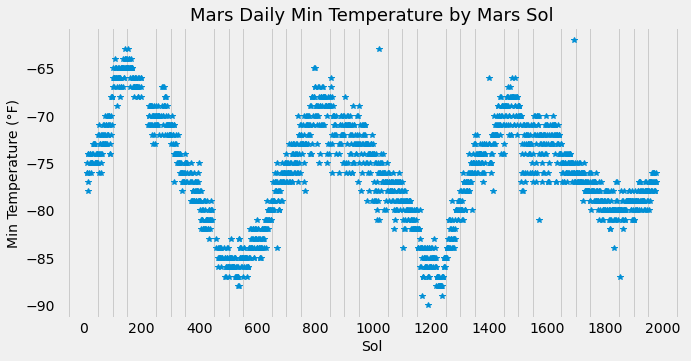

In [59]:
plot2D(pd_mars_df['sol'], pd_mars_df['min_temp'], 'Mars Daily Min Temperature by Mars Sol')

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [60]:
# Write the data to a CSV
file_name = 'Data/mars_data.csv'
pd_mars_df.to_csv(file_name, index=False)

In [63]:
browser.quit()